In the graph above, the two lines represent the linear equations:

#### 1 :  2x+y=4 (in blue)
#### 2 :  x−y=1 (in red)

The blue point represents a solution from line 1 (at 𝑥 = 2x=2).
 To project this point onto the second line (line 2), we use vector projection. The green point represents the projection of the blue point onto line 2.

In summary, projecting a point onto a line means finding the closest point on that line to the given point. This method is often used in optimization algorithms, like in your case, where the projected result is used to refine the solution across constraints.

Pour résoudre un système d'équations linéaires avec des agents, on peut utiliser des techniques de calcul distribué ou algorithmes itératifs distribués. Chaque agent possède une partie de l'information (ici, une équation), et ils vont coopérer pour trouver la solution globale sans avoir une vue complète de toutes les équations.

In [5]:
import numpy as np

A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

x = np.random.rand(3)  # x1, x2, x3 initialisés aléatoirement

# Paramètres pour l'algorithme itératif
tolerance = 1e-6
max_iterations = 1000
alpha = 0.9

print("Les valeurs initiales des inconnues sont", x)

def KacZmarg(matrice_A, matrice_b, inconnue, max_iterations, alpha, tolerance):
    n = len(matrice_b)
    for iteration in range(max_iterations):
        x_old = inconnue.copy()  # Conserver les anciennes valeurs pour la vérification de convergence
        for i in range(n):
            transposer_a = 0
            norme = 0
            # Boucle à travers chaque élément de la ligne
            for j, element in enumerate(matrice_A[i]):
                transposer_a += element * inconnue[j]  # On utilise j comme index ici
                norme += element * element
                #print(f"Inconnue[{j}] = {inconnue[j]}")
            # Mise à jour de l'inconnue
            inconnue += alpha * (matrice_b[i] - transposer_a) / norme * matrice_A[i]
        
        # Vérifier la convergence
        if np.linalg.norm(inconnue - x_old) < tolerance:
            #print(f"Convergence atteinte après {iteration+1} itérations.")
            loop = iteration
            break
    
    
    
    
    return inconnue,loop

# Appliquer l'algorithme de Kaczmarz
resultat,iter = KacZmarg(A, b, x, max_iterations, alpha, tolerance)

print("Le résultat final des inconnues est :", resultat,iter)

Les valeurs initiales des inconnues sont [0.35401149 0.46659325 0.52925547]


NameError: name 'iteration' is not defined

In [1]:
import numpy as np

def generer_systeme_lineaire(nb_variables, nb_equations):
    """
    Génère un système linéaire valide (A, b) de nb_equations équations et nb_variables variables.
    """
    # 1. Générer une solution aléatoire
    solution = np.random.randint(-10, 10, size=(nb_variables, 1))
    
    # 2. Générer une matrice A de taille nb_equations x nb_variables avec un rang maximal
    while True:
        A = np.random.randint(-10, 10, size=(nb_equations, nb_variables))
        # Vérifier que le rang est maximal (pour garantir l'indépendance linéaire)
        if np.linalg.matrix_rank(A) == nb_variables:
            break
    
    # 3. Calculer le vecteur constant b pour garantir que le système a une solution
    b = A @ solution
    
    return A, b, solution

# Exemple d'utilisation :
nb_variables = 3
nb_equations = 3
A, b, solution = generer_systeme_lineaire(nb_variables, nb_equations)

print("Matrice des coefficients A :")
print(A)
print("\nVecteur constant b :")
print(b)
print("\nSolution générée :")
print(solution)


Matrice des coefficients A :
[[ -8  -3  -1]
 [ -9  -2  -8]
 [-10   8  -3]]

Vecteur constant b :
[[61]
 [26]
 [-3]]

Solution générée :
[[-6]
 [-6]
 [ 5]]


In [4]:
import numpy as np

def generate_linear_systems(num_systems, matrix_size, min_val=-10, max_val=10):
    """
    Génère un ensemble de systèmes linéaires de la forme Ax = b.

    Parameters:
    - num_systems (int): Le nombre de systèmes linéaires à générer.
    - matrix_size (int): La taille de la matrice carrée A (ex. 3 pour une matrice 3x3).
    - min_val (int): La valeur minimale pour les éléments de A et b (défaut: -10).
    - max_val (int): La valeur maximale pour les éléments de A et b (défaut: 10).

    Returns:
    - List[Tuple[np.ndarray, np.ndarray]]: Une liste de tuples où chaque tuple contient
      une matrice A et un vecteur b pour un système linéaire.
    """
    systems = []
    for _ in range(num_systems):
        # Génère une matrice A de taille `matrix_size` x `matrix_size` avec des valeurs aléatoires
        A = np.random.randint(min_val, max_val, size=(matrix_size, matrix_size))
        
        # Vérifie si la matrice est inversible (i.e. déterminant non nul)
        if np.linalg.det(A) == 0:
            # Si non inversible, on régénère la matrice A
            while np.linalg.det(A) == 0:
                A = np.random.randint(min_val, max_val, size=(matrix_size, matrix_size))
        
        # Génère un vecteur b de taille `matrix_size` avec des valeurs aléatoires
        b = np.random.randint(min_val, max_val, size=(matrix_size,))
        
        systems.append((A, b))
    
    return systems

# Exemple d'utilisation : génère 5 systèmes linéaires de matrices 3x3
systems = generate_linear_systems(num_systems=5, matrix_size=3)
for i, (A, b) in enumerate(systems):
    print(f"Système {i+1}:")
    print("A =\n", A)
    print("b =", b)
    print("-" * 30)


Système 1:
A =
 [[-8 -4  4]
 [ 0 -2  6]
 [ 9 -8 -4]]
b = [4 3 1]
------------------------------
Système 2:
A =
 [[  3   0  -8]
 [  4   2  -7]
 [  8   9 -10]]
b = [6 9 0]
------------------------------
Système 3:
A =
 [[  1   1  -1]
 [ -3   3   6]
 [  7 -10   3]]
b = [-1 -7 -5]
------------------------------
Système 4:
A =
 [[  2   9  -6]
 [  5   1  -2]
 [ -9 -10   0]]
b = [-1  7  5]
------------------------------
Système 5:
A =
 [[ 8 -3 -8]
 [-8 -1 -8]
 [ 2  0 -6]]
b = [-6  1 -2]
------------------------------


In [2]:
import numpy as np
import json
import os

# Dossier pour stocker les graphiques
if not os.path.exists("graphs"):
    os.makedirs("graphs")

# Nombre de systèmes à générer
num_systems = 7
systems = []


# Génération de systèmes de taille croissante et stockage
for i in range(3, 10):
    A = np.random.rand(i, i)
    b = np.random.rand(i)

    # Stockage des données dans un dictionnaire
    system_data = {
        "A": A.tolist(),
        "b": b.tolist(),
        "solution": solution.tolist(),
    }
    systems.append(system_data)

# Stockage de tous les systèmes dans un fichier JSON
with open("systems_data.json", "w") as f:
    json.dump(systems, f, indent=4)

print("Les systèmes et les graphiques associés ont été stockés avec succès.")


Les systèmes et les graphiques associés ont été stockés avec succès.


In [14]:
import numpy as np
n = 2

# res = np.random.rand(2,1)
# np.ones((n, n))
# print(np.ones((n, n)))

max_iterations = 6
cons_err2 = np.zeros((max_iterations+1,n))
print(cons_err2)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [18]:
A = np.random.rand(n, n)
print(A)
size = A.shape[0]
print(size)

[[0.93467477 0.84926333]
 [0.7990969  0.24156699]]
2


C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:67: RuntimeWarning: overflow encountered in multiply
  X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:29: RuntimeWarning: invalid value encountered in subtract
  disagree[i] = max(disagree[i], np.linalg.norm(X[:, i] - X[:, j]))
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:8: RuntimeWarning: invalid value encountered in subtract
  return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A
C:\Users\t-lab\AppData\Local\Temp\ipykernel_13860\301913395.py:66: RuntimeWarning: overflow encountered in scalar multiply
  step[i] = 1.5 * step[i]


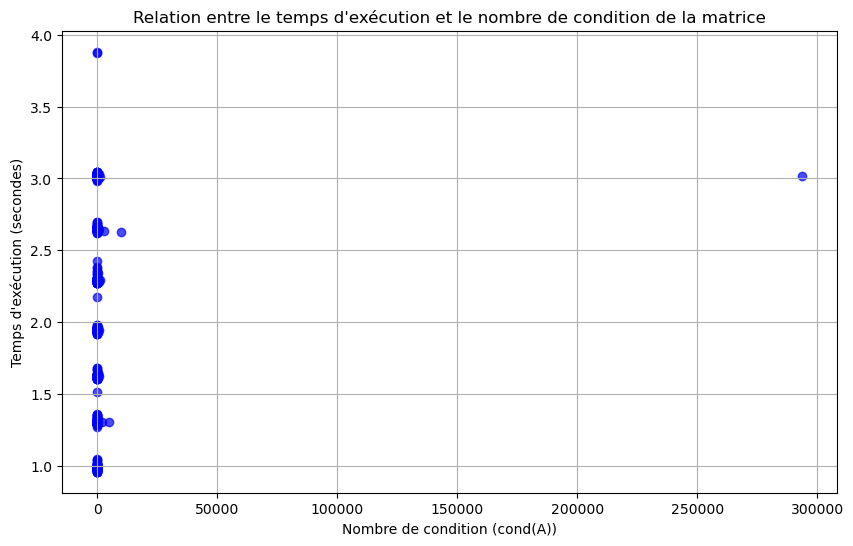

In [1]:
import numpy as np
import json
import time
import matplotlib.pyplot as plt

# Projection utilisée dans l'algorithme
def projection(A, b, x):
    return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A

# Fonction pour générer une matrice de pondération W (symétrique)
def matrice_W(n):
    W = np.eye(n) * 0.5
    for i in range(n - 1):
        W[i, i + 1] = 0.25
        W[i + 1, i] = 0.25
    return W

# Fonction calculant les erreurs locales
def local_error(A, b, X, W, n):
    err = np.zeros(n)
    disagree = np.zeros(n)

    for i in range(n):
        err[i] = abs(np.dot(A[i, :], X[:, i]) - b[i])

    for i in range(n):
        for j in range(n):
            if W[i, j] > 0.0:
                disagree[i] = max(disagree[i], np.linalg.norm(X[:, i] - X[:, j]))
    return err, disagree

# Algorithme principal
def inertial_projected_consensus_algorithm(A, b, max_iterations=10000, tol=1e-5):
    n = len(b)
    X_init = 2.0 * np.random.rand(n, n) - np.ones((n, n))
    X_i = X_init
    Y = np.zeros((n, n))
    W = matrice_W(n)
    theta = np.zeros(n)
    step = np.full(n, float('inf'))
    eps = 1e-9

    iter = 0
    eqn_err, cons_err = np.inf, np.inf
    while iter < max_iterations:
        iter += 1
        for i in range(n):
            X_i[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        X_i = np.dot(X_i, W)

        for i in range(n):
            Y[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        Y = np.dot(Y, W)

        for i in range(n):
            if abs(np.dot(A[i, :], Y[:, i] - X_i[:, i])) < eps:
                theta[i] = float('inf')
            else:
                theta[i] = (np.dot(A[i, :], X_i[:, i]) - b[i]) / np.dot(A[i, :], X_i[:, i] - Y[:, i])

        for i in range(n):
            for j in range(n):
                if W[i, j] > 0.0 and theta[j] > eps and theta[j] < step[i]:
                    step[i] = theta[j]
            if step[i] < float('inf'):
                step[i] = 1.5 * step[i]
                X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
        X_i = np.dot(X_i, W)

        eqn_err, cons_err = local_error(A, b, X_i, W, n)
        if max(eqn_err) < tol and max(cons_err) < tol:
            break

    return iter

# Chargement des données JSON
with open("../ressource/System_of_linear_equations/systems_data_3x3_to_10x10.json", "r") as f:
    systems_data = json.load(f)

# Variables pour stocker les résultats
condition_numbers = []
execution_times = []

# Boucle sur tous les systèmes dans le fichier JSON
for system in systems_data:
    A = np.array(system["A"])
    b = np.array(system["b"])

    # Calcul du nombre de condition de A
    cond_number = np.linalg.cond(A)
    condition_numbers.append(cond_number)

    # Mesure du temps d'exécution
    start_time = time.time()
    inertial_projected_consensus_algorithm(A, b)
    exec_time = time.time() - start_time
    execution_times.append(exec_time)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(condition_numbers, execution_times, color="blue", alpha=0.7)
plt.title("Relation entre le temps d'exécution et le nombre de condition de la matrice")
plt.xlabel("Nombre de condition (cond(A))")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()


Converged in 22 iterations


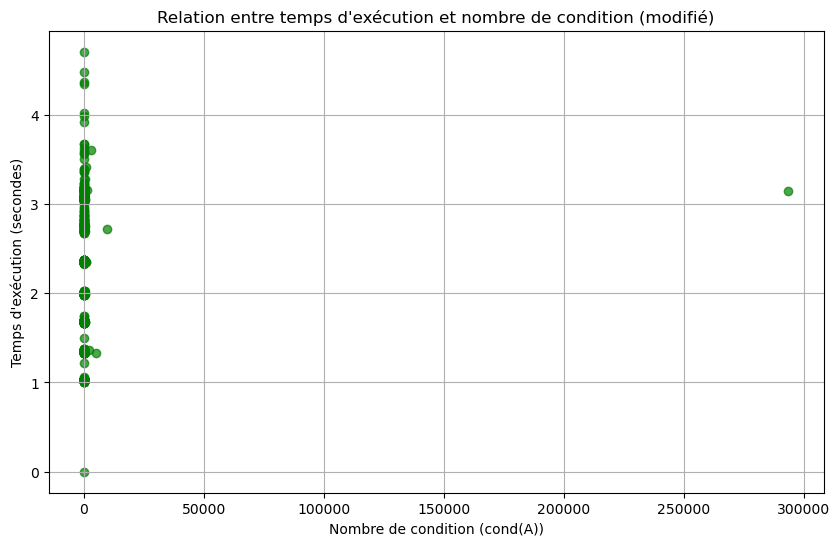

In [4]:
import numpy as np
import json
import time
import matplotlib.pyplot as plt

# Fonction de projection utilisée dans l'algorithme
def projection(A, b, x):
    return x - (np.dot(A, x) - b) / max(np.dot(A, A.T), 1e-9) * A

# Fonction pour générer une matrice de pondération W (symétrique)
def matrice_W(n):
    W = np.eye(n) * 0.5
    for i in range(n - 1):
        W[i, i + 1] = 0.25
        W[i + 1, i] = 0.25
    return W

# Fonction de convergence
def has_converged(x, x_old, tolerance):
    return np.linalg.norm(x - x_old) < tolerance

# Algorithme principal modifié
def inertial_projected_consensus_algorithm_modified(A, b, max_iterations=10000, tol=1e-5):
    n = len(b)
    X_init = 2.0 * np.random.rand(n, n) - np.ones((n, n))
    X_i = X_init
    X_old = np.copy(X_i)
    Y = np.zeros((n, n))
    W = matrice_W(n)
    theta = np.zeros(n)
    step = np.full(n, float('inf'))
    eps = 1e-9

    # Calcul du nombre de condition
    cond_number = np.linalg.cond(A)
    iter = 0
    
    eqn_err, cons_err = np.inf, np.inf
    while iter < max_iterations:
        iter += 1
        
        # Mise à jour de X
        for i in range(n):
            X_i[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        X_i = np.dot(X_i, W)

        # Mise à jour de Y
        for i in range(n):
            Y[:, i] = projection(A[i, :].T, b[i], X_i[:, i])
        Y = np.dot(Y, W)

        # Calcul des paramètres theta
        for i in range(n):
            if abs(np.dot(A[i, :], Y[:, i] - X_i[:, i])) < eps:
                theta[i] = float('inf')
            else:
                theta[i] = (np.dot(A[i, :], X_i[:, i]) - b[i]) / np.dot(A[i, :], X_i[:, i] - Y[:, i])

        # Mise à jour de step et de X
        for i in range(n):
            for j in range(n):
                if W[i, j] > 0.0 and theta[j] > eps and theta[j] < step[i]:
                    step[i] = theta[j]
            if step[i] < float('inf'):
                step[i] = 1.5 * step[i]
                X_i[:, i] = X_i[:, i] + step[i] * (Y[:, i] - X_i[:, i])
        X_i = np.dot(X_i, W)

        # Vérification de la convergence locale
        eqn_err, cons_err = local_error(A, b, X_i, W, n)

        # Arrêt anticipé basé sur la convergence des itérations
        if has_converged(X_i, X_old, tol):
            print(f"Converged in {iter} iterations")
            break
        X_old = np.copy(X_i)  # Mettre à jour X_old pour la prochaine itération

        # Arrêt basé sur la convergence globale
        if max(eqn_err) < tol and max(cons_err) < tol:
            print(f"Converged in {iter} iterations (global tolerance reached)")
            break

    return iter

# Chargement des données JSON
with open("../ressource/System_of_linear_equations/systems_data_3x3_to_10x10.json", "r") as f:
    systems_data = json.load(f)

# Visualisation de la relation entre temps d'exécution et condition number
condition_numbers = []
execution_times = []

for system in systems_data:
    A = np.array(system["A"])
    b = np.array(system["b"])
    
    # Calcul du nombre de condition
    cond_number = np.linalg.cond(A)
    
    if cond_number > 500:
        pass
    
    condition_numbers.append(cond_number)

    # Mesure du temps d'exécution
    start_time = time.time()
    inertial_projected_consensus_algorithm_modified(A, b)
    exec_time = time.time() - start_time
    execution_times.append(exec_time)
    print("execution_times:",execution_times,"condition_numbers:",condition_numbers,"iteration",inertial_projected_consensus_algorithm_modified)
# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(condition_numbers, execution_times, color="green", alpha=0.7)
plt.title("Relation entre temps d'exécution et nombre de condition (modifié)")
plt.xlabel("Nombre de condition (cond(A))")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()


In [4]:
import numpy as np
n=5

w = np.ones((n, n)) / n
print(w) 
                                                                         

[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]


In [35]:
#Graphe étoile 
import numpy as np
n=5
w = np.zeros((n, n))
for i in range(1, n):
    w[0,i] =1/n-1
    w[i,0]=1
print(w)

[[ 0.  -0.8 -0.8 -0.8 -0.8]
 [ 1.   0.   0.   0.   0. ]
 [ 1.   0.   0.   0.   0. ]
 [ 1.   0.   0.   0.   0. ]
 [ 1.   0.   0.   0.   0. ]]


In [45]:
#Graphe path 
import numpy as np
n=5
w = np.zeros((n, n))
w[0,0] =0.5
w[0,1] =0.5
w[n-1,n-1] =0.5
w[n-1,n-2] =0.5

for i in range(1,n-1):
    w[i,i+1] =1/2
    w[i,i-1] =1/2
print(w)

[[0.5 0.5 0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.5 0.5]]


In [43]:
#Graphe cyclique 
import numpy as np
n=5
w = np.zeros((n, n))
for i in range(n):
    w[i,i]=1/3
    w[i,(i-1)%n]=1/3
    w[i,(i+1)%n]=1/3
    
print(w)

[[0.33333333 0.33333333 0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.         0.         0.33333333 0.33333333]]


In [4]:
import numpy as np

# ============================
# Fonction de méthode de Jacobi distribuée
# ============================
def distributed_jacobi(A, b, W, tol=1e-6, max_iter=1000):
    """
    Résout un système d'équations linéaires Ax = b de manière distribuée avec la méthode de Jacobi.

    Arguments :
    - A : Matrice de coefficients (chaque agent ne possède qu'une ligne de A)
    - b : Vecteur des constantes (chaque agent ne possède qu'une valeur de b)
    - W : Matrice de communication (modélise les connexions entre les agents)
    - tol : Tolérance pour la convergence
    - max_iter : Nombre maximal d'itérations

    Retourne :
    - x : Solution approchée du système linéaire
    """
    n = len(b)  # Nombre d'agents
    x = np.zeros(n)  # Initialisation des estimations de la solution (vecteur partagé entre agents)
    x_prev = np.zeros(n)  # Stocke la solution de l'itération précédente
    x_true = np.linalg.solve(A, b)
    
    # Vérifie que la matrice de communication W est valide
    if not is_communication_graph_valid(W):
        raise ValueError("La matrice de communication W ne connecte pas tous les agents.")

    # Itérations de la méthode de Jacobi
    for iteration in range(max_iter):
        # Calcul de la nouvelle estimation locale de chaque agent
        for i in range(n):
            sum_neighbors = 0
            for j in range(n):
                if i != j:  # On ignore la diagonale d'A
                    sum_neighbors += A[i, j] * x_prev[j]
            x[i] = (b[i] - sum_neighbors) / A[i, i]  # Calcul de la solution locale

        # Communication entre agents (via W)
        x = np.dot(W, x)  # Partage des solutions intermédiaires via la matrice de communication

        # Critère de convergence
        if np.linalg.norm(x - x_prev) < tol:
            print(f"Convergence atteinte en {iteration + 1} itérations.")
            return x

        # Mise à jour pour l'itération suivante
        x_prev = x.copy()

    print("La méthode de Jacobi n'a pas convergé après le nombre maximal d'itérations.")
    return x

# ============================
# Fonction pour valider la matrice de communication
# ============================
def is_communication_graph_valid(W):
    """
    Vérifie que tous les agents peuvent communiquer (le graphe de communication est connexe).

    Arguments :
    - W : Matrice de communication

    Retourne :
    - True si tous les agents sont connectés, False sinon.
    """
    n = W.shape[0]
    visited = np.zeros(n)

    # Parcours en profondeur pour vérifier la connexité
    def dfs(node):
        visited[node] = 1
        for neighbor in range(n):
            if W[node, neighbor] > 0 and visited[neighbor] == 0:
                dfs(neighbor)

    dfs(0)  # Commence avec le premier agent
    return np.all(visited)

# ============================
# Exemple d'utilisation
# ============================
if __name__ == "__main__":
    # Exemple : 3 agents (3 équations linéaires)
    A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 3]])
    
    b = np.array([15, 10, 10])

    # Exemple de matrice de communication (graphe complet)
    n = len(b)
    W = w = np.ones((n, n)) / n


    # Résolution avec la méthode de Jacobi distribuée
    x_approx = distributed_jacobi(A, b, W)

    # Affichage de la solution approchée
    print("Solution approchée :", x_approx)

    # Vérification avec la solution exacte
    x_true = np.linalg.solve(A, b)
    print("Solution exacte :", x_true)

Convergence atteinte en 17 itérations.
Solution approchée : [4.99999985 4.99999985 4.99999985]
Solution exacte : [5. 5. 5.]


In [5]:
import numpy as np

def projection(A_row, b_val, x):
    """
    Projette x sur l'hyperplan défini par A_row @ x = b_val.
    """
    numerator = b_val - np.dot(A_row, x)
    denominator = np.dot(A_row, A_row)
    if denominator == 0:  # Pour éviter une division par zéro
        return x
    return x + (numerator / denominator) * A_row


def local_error(A, b, X_s, W):
    """
    Calcule les erreurs locales pour les contraintes et le consensus.
    """
    n = A.shape[0]
    eqn_err = np.zeros(n)
    cons_err = np.zeros(n)
    for i in range(n):
        eqn_err[i] = abs(np.dot(A[i, :], X_s[:, i]) - b[i])
        cons_err[i] = np.linalg.norm(X_s[:, i] - np.dot(X_s, W[:, i]))
    return eqn_err, cons_err


def global_error(A, b, X_s):
    """
    Calcule l'erreur globale pour l'ensemble des agents.
    """
    return np.linalg.norm(np.dot(A, X_s.mean(axis=1)) - b)


def projected_consensus_algorithm(A, b, W, X_init, tol=1e-6, max_iter=1000):
    """
    Implémente l'algorithme de consensus projeté pour résoudre le système.
    
    Args:
        A (np.array): Matrice des coefficients (n x m).
        b (np.array): Vecteur des termes constants (n,).
        W (np.array): Matrice de poids (n x n).
        X_init (np.array): Matrice initiale des solutions (m x n).
        tol (float): Tolérance pour les critères d'arrêt.
        max_iter (int): Nombre maximum d'itérations.
    
    Returns:
        np.array: Solution finale X_s.
    """
    n = A.shape[0]
    iter1 = 0
    X_s = X_init.copy()  # Copie pour ne pas modifier l'original
    eqn_err1 = np.zeros((max_iter, n))
    cons_err1 = np.zeros((max_iter, n))
    glob_err1 = np.zeros(max_iter)

    # Boucle principale
    while iter1 < max_iter:
        # Vérifie les erreurs pour arrêter la boucle
        if iter1 > 0 and max(eqn_err1[iter1 - 1, :]) <= tol and max(cons_err1[iter1 - 1, :]) <= tol:
            break

        iter1 += 1

        # Mise à jour locale
        for i in range(n):
            X_s[:, i] = projection(A[i, :], b[i], X_s[:, i])

        # Consensus
        X_s = np.dot(X_s, W.T)

        # Calcul des erreurs
        eqn_err1[iter1 - 1, :], cons_err1[iter1 - 1, :] = local_error(A, b, X_s, W)
        glob_err1[iter1 - 1] = global_error(A, b, X_s)

    print(f"Algorithme convergé en {iter1} itérations avec une erreur globale de {glob_err1[iter1 - 1]:.6f}")
    return X_s.mean(axis=1)  # Retourne la moyenne des solutions comme consensus final


# Exemple d'utilisation
if __name__ == "__main__":
    A = np.array([[4, 1, 2],
                  [3, 5, 1],
                  [1, 1, 3]])

    b = np.array([4, 7, 3])

    W = np.array([[0.5, 0.25, 0.25],
                  [0.25, 0.5, 0.25],
                  [0.25, 0.25, 0.5]])  # Matrice de poids (symétrique et stochastique)

    X_init = np.random.rand(A.shape[1], A.shape[0])  # Initialisation aléatoire

    solution = projected_consensus_algorithm(A, b, W, X_init)
    print("Solution finale :", solution)


Algorithme convergé en 220 itérations avec une erreur globale de 0.000002
Solution finale : [0.50000054 0.99999956 0.49999978]


Solution distribuée obtenue :
[0.50000039 0.99999968 0.49999984]
Solution exacte (np.linalg.solve) :
[0.5 1.  0.5]


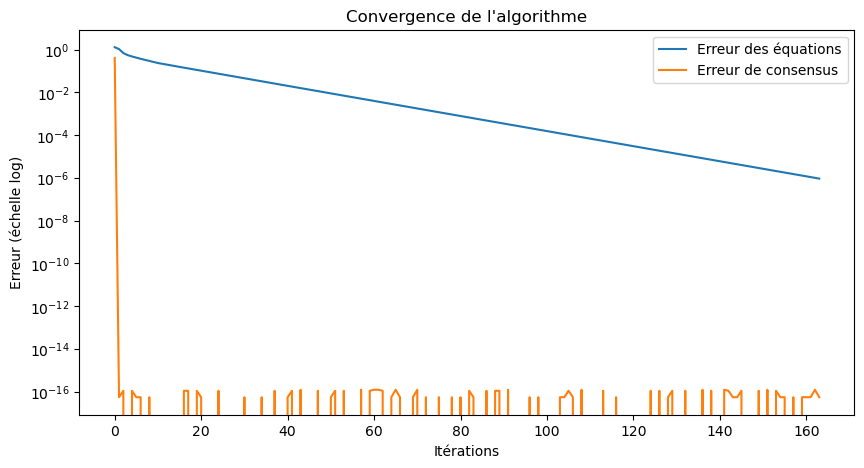

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# Fonction de projection
# =============================
def projection(b_i, c_i, x):
    """
    Projette x sur l'ensemble Xi = {x | b_i^T x = c_i, x >= 0}.
    Si l'ensemble est vide, retourne -1.
    """
    y = x.copy()
    if np.dot(b_i, b_i) == 0:  # Cas pathologique (b_i = 0)
        return -1 if c_i != 0 else y
    alpha = (c_i - np.dot(b_i, y)) / np.dot(b_i, b_i)  # Correction pour respecter b_i^T y = c_i
    y += alpha * b_i  # Ajuste y dans la direction de b_i
    y = np.maximum(y, 0)  # Applique la contrainte x >= 0
    return y

# =============================
# Matrice de communication
# =============================
def generate_weight_matrix(n):
    """
    Génère une matrice de communication symétrique (étoile, chaîne, ou autre).
    """
    W = np.ones((n, n)) / n  # Matrice uniformément pondérée
    return W

# =============================
# Algorithme de consensus projeté
# =============================
def simple_projected_consensus(A, b, X_init, W, tol=1e-6, max_iter=1000):
    """
    Algorithme simple de consensus projeté pour résoudre Ax = b.
    """
    n = len(b)  # Nombre d'agents
    iter1 = 0
    X_s = X_init.copy()
    
    # Erreurs pour l'analyse
    eqn_err = []
    cons_err = []
    x_erro_simple_projected_consensus = []
    
    while iter1 < max_iter:
        # Mettre à jour les erreurs pour les critères d'arrêt
        eqn_errors = [abs(np.dot(A[i], X_s[:, i]) - b[i]) for i in range(n)]
        consensus_errors = [np.linalg.norm(X_s[:, i] - np.mean(X_s, axis=1)) for i in range(n)]
        
        eqn_err.append(max(eqn_errors))
        cons_err.append(max(consensus_errors))
        
        
        
        if max(eqn_errors) < tol and max(consensus_errors) < tol:
            break

        # Algorithme : Projections et consensus
        for i in range(n):
            X_s[:, i] = projection(A[i], b[i], X_s[:, i])  # Projection locale
        X_s = np.dot(X_s, W.T)  # Mise à jour via la matrice de communication
        
        x_mean = np.mean(X_s, axis=1)  # Moyenne des estimations
        error = np.linalg.norm(true_solution - x_mean)  # Différence avec la solution exacte
        x_erro_simple_projected_consensus.append(error)
    
        iter1 += 1

    return X_s, eqn_err, cons_err ,x_erro_simple_projected_consensus

# =============================
# Exemple
# =============================
if __name__ == "__main__":
    # Matrice A et vecteur b
    A = np.array([[4, 1, 2],
                  [3, 5, 1],
                  [1, 1, 3]])
    b = np.array([4, 7, 3])

    # Initialisation aléatoire
    n = len(b)
    X_init = np.random.rand(len(A[0]), n)

    # Génération de la matrice de communication
    W = generate_weight_matrix(n)

    # Appel de l'algorithme
    X_s, eqn_err, cons_err = simple_projected_consensus(A, b, X_init, W)

    # Affichage des résultats
    print("Solution distribuée obtenue :")
    print(X_s.mean(axis=1))  # Moyenne de X_s (consensus)
    print("Solution exacte (np.linalg.solve) :")
    print(np.linalg.solve(A, b))  # Pour comparer avec la solution exacte

    # Tracé des erreurs
    plt.figure(figsize=(10, 5))
    plt.plot(eqn_err, label="Erreur des équations")
    plt.plot(cons_err, label="Erreur de consensus")
    plt.yscale("log")
    plt.xlabel("Itérations")
    plt.ylabel("Erreur (échelle log)")
    plt.legend()
    plt.title("Convergence de l'algorithme")
    plt.show()


Solution trouvée :  [0.50000068 0.99999944 0.49999973]
Erreur finale :  9.223947575630327e-07
Nombre d'itérations :  153


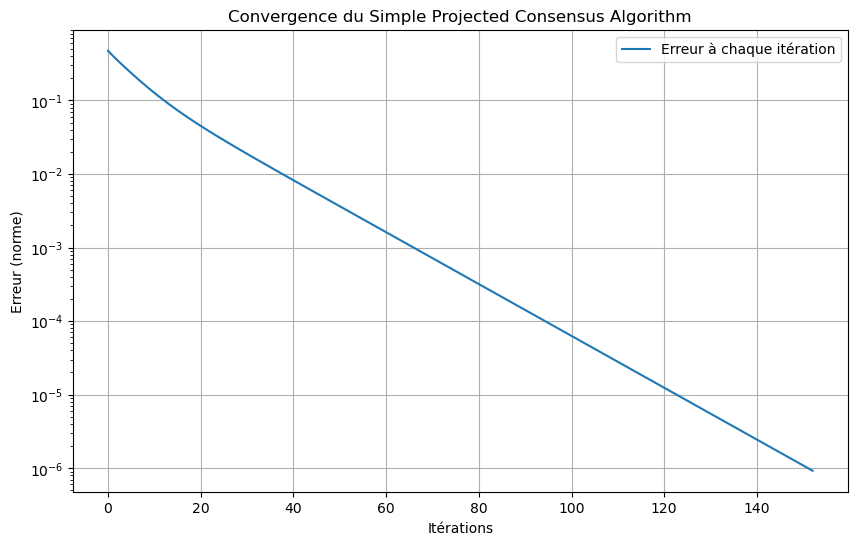

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de projection définie précédemment
def projection(bi, ci, x):
    """
    Projection de x sur l'ensemble défini par {x | b_i * x = c_i, x >= 0}.
    """
    if np.dot(bi, bi) == 0:
        return -1  # Ensemble vide
    alpha = (ci - np.dot(bi, x)) / np.dot(bi, bi)
    y = x + alpha * bi
    return np.maximum(y, 0)  # Assure x >= 0

# Données du problème
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])
n = A.shape[0]
true_solution = np.linalg.solve(A, b)

# Matrice de communication (étoile)
W = (1/n) * np.ones((n, n))

# Initialisation
X_init = np.random.rand(A.shape[1], n)  # Initialisation aléatoire
tol = 1e-6
max_iter = 1000
X_s = X_init.copy()

# Suivi des erreurs
x_erro_simple_projected_consensus = []

# Simple Projected Consensus Algorithm
iter1 = 0
while iter1 < max_iter:
    iter1 += 1
    
    # Étape de projection
    for i in range(n):
        X_s[:, i] = projection(A[i, :].T, b[i], X_s[:, i])
    
    # Étape de consensus
    X_s = np.dot(X_s, W.T)
    
    # Calcul de l'erreur
    x_mean = np.mean(X_s, axis=1)  # Moyenne des estimations
    error = np.linalg.norm(true_solution - x_mean)  # Différence avec la solution exacte
    x_erro_simple_projected_consensus.append(error)
    
    # Condition d'arrêt
    if error < tol:
        break

# Résultats
print("Solution trouvée : ", x_mean)
print("Erreur finale : ", x_erro_simple_projected_consensus[-1])
print("Nombre d'itérations : ", iter1)

# Graphique des erreurs
plt.figure(figsize=(10, 6))
plt.plot(x_erro_simple_projected_consensus, label="Erreur à chaque itération")
plt.yscale('log')
plt.xlabel("Itérations")
plt.ylabel("Erreur (norme)")
plt.title("Convergence du Simple Projected Consensus Algorithm")
plt.legend()
plt.grid()
plt.show()


In [3]:
X_init = np.random.rand(A.shape[1], n)

print(X_init)

[[0.85285403 0.19842378 0.22998608]
 [0.09181873 0.72226207 0.22723079]
 [0.50472743 0.64703317 0.20874162]]


In [9]:
import numpy as np
from numpy.linalg import solve
from Comunication_matrix import complete_graph
import matplotlib.pyplot as plt

def Inertial_Projected_Consensus_Algorithm(A, b, x_init, W, max_iter=1000, tol=1e-5):
    """
    Algorithme de consensus projeté inertiel pour résoudre Ax = b.

    Args:
        A : Matrice des coefficients (n x n).
        b : Vecteur des constantes (n,).
        x_init : Initialisation (n,).
        W : Matrice de communication (n x n).
        max_iter : Nombre maximal d'itérations.
        tol : Tolérance pour la convergence.

    Returns:
        x : Solution approchée.
        iter_count : Nombre d'itérations réalisées.
        errors : Liste des erreurs globales.
    """
    n = len(b)
    x = x_init.copy()  # Initialisation
    errors = []  # Liste des erreurs globales
    true_solution = solve(A, b)  # Solution exacte pour référence

    def projection(a, bi, xi):
        """
        Projection de xi sur l'hyperplan défini par {x | a @ x = bi}.
        """
        norm_a = np.linalg.norm(a)
        if norm_a > 0:
            correction = (bi - np.dot(a, xi)) / norm_a**2
            return xi + correction * a
        return xi  # Aucun changement si a est nul

    # Main iterative loop
    for iteration in range(max_iter):
        x_old = x.copy()

        # Mise à jour par projection locale pour chaque agent
        for i in range(n):
            x = projection(A[i, :], b[i], x)

        # Consensus via la matrice de communication
        x = np.dot(W, x)

        # Calcul de l'erreur globale
        error = np.linalg.norm(true_solution - x)
        errors.append(error)

        # Condition d'arrêt
        if error < tol:
            print(f"Convergence atteinte après {iteration + 1} itérations.")
            return x, iteration + 1, errors

    print("Convergence non atteinte après le nombre maximal d'itérations.")
    return x, max_iter, errors


# ============================
# Exemple d'utilisation
# ============================
if __name__ == "__main__":
    # Définition du problème
    A = np.array([[4, 1, 2],
                  [3, 5, 1],
                  [1, 1, 3]], dtype=float)
    b = np.array([4, 7, 3], dtype=float)

    # Matrice de communication (graphe complet)
    W = complete_graph(len(b))
    x_init = np.random.rand(len(b))  # Initialisation aléatoire

    # Appel de l'algorithme
    x_approx, iterations, errors = Inertial_Projected_Consensus_Algorithm(A, b, x_init, W, max_iter=1000)

    # Affichage des résultats
    print("Solution approximée :", errors)
    print("Solution exacte :", solve(A, b))
    print("Nombre d'itérations :", iterations)

    # Tracé des erreurs

    # plt.figure(figsize=(10, 6))
    # plt.plot(errors, label="Erreur globale")
    # plt.yscale('log')
    # plt.xlabel("Itérations")
    # plt.ylabel("Erreur (norme)")
    # plt.title("Convergence de l'algorithme de consensus projeté inertiel")
    # plt.legend()
    # plt.grid()
    # plt.show()


Convergence non atteinte après le nombre maximal d'itérations.
Solution approximée : [0.4085944669158375, 0.40872433531014757, 0.4085916564226741, 0.4086016472310668, 0.4086008287775586, 0.4086008953522006, 0.40860088993377, 0.40860089037474895, 0.40860089033885977, 0.40860089034178054, 0.40860089034154284, 0.40860089034156216, 0.4086008903415606, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.4086008903415608, 0.40860089